**Web Scrapping**

Authentication

In [ ]:
import tweepy
import pandas as pd

# Variables that contains the credentials to access Twitter API
ACCESS_TOKEN = '1090888242335932421-S4eIEaJeEU62Jt8hW1VsqEuVVqsvp3'
ACCESS_SECRET = '4mCzr8Dq9QhCftWJFY87o1PFcgxwDlhyUAH58loK2ThxW'
CONSUMER_KEY = 'bHJY3dVFriRHJ8AizVnBywzGf'
CONSUMER_SECRET = 'jOs9kXL3cX6f43IvCXq6b28cL2AG8bNYEJEYySSRkeLYgYqnQn'


# Setup access to API
def connect_to_twitter_OAuth():
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    api = tweepy.API(auth)
    return api

# Create API object
api = connect_to_twitter_OAuth()

Get Tweets according to keyword "BNI"

In [ ]:
text_query = 'BNI'
max_tweets = 1000
 
# Creation of query method using parameters
tweets = tweepy.Cursor(api.search,q=text_query,since="2020-11-01", until="2020-11-29").items(max_tweets)
 
# Pulling information from tweets iterable object
tweets_list = [[tweet.id_str,
                tweet.created_at, 
                tweet.text, 
                tweet.user.name, 
                tweet.user.screen_name, 
                tweet.user.id_str, 
                tweet.user.location, 
                tweet.user.followers_count] for tweet in tweets]
 
# Creation of dataframe from tweets_list
tweets_df = pd.DataFrame(tweets_list, columns=['id_str',
                                               'created_at',
                                               'tweets',
                                               'user_name',
                                               'user_screenname',
                                               'user_id',
                                               'user_location',
                                               'user_followerscount'])
tweets_df

Mount to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Saved to CSV

In [ ]:
result = pd.DataFrame(tweets_df)
result.to_csv('/gdrive/My Drive/Project_DE/data.csv', index = False)
print("Data has been saved successfully")

**Retrieve Data**

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [1]:
import pandas as pd
data21 = pd.read_csv('data_21.csv')
data21

time     tweets_id  \
0    21-11-20 11:59  1.330300e+18   
1    21-11-20 11:56  1.330300e+18   
2    21-11-20 11:54  1.330300e+18   
3    21-11-20 23:51  1.330300e+18   
4    21-11-20 11:48  1.330300e+18   
..              ...           ...   
376  30-11-20 15:01  1.330000e+18   
377  30-11-20 15:01  1.330000e+18   
378  30-11-20 15:00  1.330000e+18   
379  30-11-20 14:59  1.330000e+18   
380  30-11-20 14:58  1.330000e+18   

                                                tweets  retweets  count_likes  \
0    @masmasjawabgt Saldonya buat nabung boleh ga m...         0            0   
1    RT @hhjdinn: [Help RT]\n\nBismillahüôèüèª\nYukk ak...        27            0   
2    @banjarbase Kalo aku kmrian BNI mbanking tingg...         0            0   
3    @DORbertanya @BNI @BPJSTKinfo @KemnakerRI Saya...         0            2   
4    Transfer k No rekening\nBRI 411401008723530\nB...         0            0   
..                                                 ...       ...          ...   
376  @niagarapokpou @JNECare @jntexpressid Halo @BN...         0            0   
377  @restuachill_ @astro_rizki @Iqbalfas @hrdbacot...         0            0   
378  RT @johfamfess: Cara Berdonasi\n1. Klik Tombol...         4            0   
379  @QnA18MENFESS BNI TAPLUS MUDA nder, admin nya ...         0            0   
380                 @sellkpopfess 414,250 dana/BNI/ovo         0            0   

                  source                           source_url  Unnamed: 7  \
0    Twitter for Android  http://twitter.com/download/android         NaN   
1    Twitter for Android  http://twitter.com/download/android         NaN   
2    Twitter for Android  http://twitter.com/download/android         NaN   
3    Twitter for Android  http://twitter.com/download/android         NaN   
4           twittbot.net                 http://twittbot.net/         NaN   
..                   ...                                  ...         ...   
376  Twitter for Android  http://twitter.com/download/android         NaN   
377   Twitter for iPhone   http://twitter.com/download/iphone         NaN   
378  Twitter for Android  http://twitter.com/download/android         NaN   
379  Twitter for Android  http://twitter.com/download/android         NaN   
380  Twitter for Android  http://twitter.com/download/android         NaN   

     Unnamed: 8  Unnamed: 9  
0           NaN         NaN  
1           NaN         NaN  
2           NaN         NaN  
3           NaN         NaN  
4           NaN         NaN  
..          ...         ...  
376         NaN         NaN  
377         NaN         NaN  
378         NaN         NaN  
379         NaN         NaN  
380         NaN         NaN  

[381 rows x 10 columns]

**Text Pre-Processing**

In [2]:
data21 = pd.DataFrame(data21,columns=['time','tweets'])
data21.head()

time                                             tweets
0  21-11-20 11:59  @masmasjawabgt Saldonya buat nabung boleh ga m...
1  21-11-20 11:56  RT @hhjdinn: [Help RT]\n\nBismillahüôèüèª\nYukk ak...
2  21-11-20 11:54  @banjarbase Kalo aku kmrian BNI mbanking tingg...
3  21-11-20 23:51  @DORbertanya @BNI @BPJSTKinfo @KemnakerRI Saya...
4  21-11-20 11:48  Transfer k No rekening\nBRI 411401008723530\nB...

Removing '@names'

In [3]:
import numpy as np
import re
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [4]:
data21['tweets'] = np.vectorize(remove_pattern)(data21['tweets'], "@[\w]*")
data21.head()

time                                             tweets
0  21-11-20 11:59   Saldonya buat nabung boleh ga mas? Kalo boleh...
1  21-11-20 11:56  RT : [Help RT]\n\nBismillahüôèüèª\nYukk aku jual j...
2  21-11-20 11:54   Kalo aku kmrian BNI mbanking tinggal unintall...
3  21-11-20 23:51      Saya BNI jg blm cair sampe skrg, padahal p...
4  21-11-20 11:48  Transfer k No rekening\nBRI 411401008723530\nB...

Removing links, such as http, https

In [5]:
cleaned_tweets = []
for index, row in data21.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.tweets.split() if 'http' not in word]
    cleaned_tweets.append(' '.join(words_without_links))
data21['tweets'] = cleaned_tweets
data21.head()

time                                             tweets
0  21-11-20 11:59  Saldonya buat nabung boleh ga mas? Kalo boleh ...
1  21-11-20 11:56  RT : [Help RT] Bismillahüôèüèª Yukk aku jual jasa ...
2  21-11-20 11:54  Kalo aku kmrian BNI mbanking tinggal unintall ...
3  21-11-20 23:51  Saya BNI jg blm cair sampe skrg, padahal pas b...
4  21-11-20 11:48  Transfer k No rekening BRI 411401008723530 BCA...

Removing tweets with empty text

In [6]:
data21 = data21[data21['tweets']!='']
data21.head()

time                                             tweets
0  21-11-20 11:59  Saldonya buat nabung boleh ga mas? Kalo boleh ...
1  21-11-20 11:56  RT : [Help RT] Bismillahüôèüèª Yukk aku jual jasa ...
2  21-11-20 11:54  Kalo aku kmrian BNI mbanking tinggal unintall ...
3  21-11-20 23:51  Saya BNI jg blm cair sampe skrg, padahal pas b...
4  21-11-20 11:48  Transfer k No rekening BRI 411401008723530 BCA...

Removing Punctuations, Special characters and Emoticon

In [7]:
data21['tweets'] = data21['tweets'].str.replace("[^a-zA-Z0-9]#?", " ")
data21['tweets'] = data21['tweets'].str.replace(r'[^\x00-\x7F]+', '', regex=True)
data21.head()

time                                             tweets
0  21-11-20 11:59  Saldonya buat nabung boleh ga mas  Kalo boleh ...
1  21-11-20 11:56  RT    Help RT  Bismillah   Yukk aku jual jasa ...
2  21-11-20 11:54  Kalo aku kmrian BNI mbanking tinggal unintall ...
3  21-11-20 23:51  Saya BNI jg blm cair sampe skrg  padahal pas b...
4  21-11-20 11:48  Transfer k No rekening BRI 411401008723530 BCA...

Removing Stop words

In [8]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words("indonesian"))

[nltk_data] Downloading package stopwords to C:\Users\Tania
[nltk_data]     Ciu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [9]:
stopwords_set = set(stopwords)
cleaned_tweets = []

for index, row in data21.iterrows():
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.tweets.split() if not word in stopwords_set and '#' not in word.lower()]  
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
data21['tweets'] = cleaned_tweets
data21.head()

time                                             tweets
0  21-11-20 11:59  Saldonya nabung ga mas Kalo ikutan kirim BNI s...
1  21-11-20 11:56  RT Help RT Bismillah Yukk jual jasa premium ap...
2  21-11-20 11:54  Kalo kmrian BNI mbanking tinggal unintall inst...
3  21-11-20 23:51  Saya BNI jg blm cair sampe skrg pas blt termin...
4  21-11-20 11:48  Transfer k No rekening BRI 411401008723530 BCA...

Tokenization

In [10]:
from nltk.stem import WordNetLemmatizer# Tokenization
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Tania
[nltk_data]     Ciu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [11]:
tokenized_tweet = data21['tweets'].apply(lambda x: x.split())

# Finding Lemma for each word
word_lemmatizer = WordNetLemmatizer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])

#joining words into sentences (from where they came from)
for i, tokens in enumerate(tokenized_tweet):
    tokenized_tweet[i] = ' '.join(tokens)

data21['tweets'] = tokenized_tweet
tokenized_tweet.head()

0    Saldonya nabung ga ma Kalo ikutan kirim BNI se...
1    RT Help RT Bismillah Yukk jual jasa premium ap...
2    Kalo kmrian BNI mbanking tinggal unintall inst...
3    Saya BNI jg blm cair sampe skrg pa blt termin ...
4    Transfer k No rekening BRI 411401008723530 BCA...
Name: tweets, dtype: object

**Visualization**

Fetch Sentiments using Sentiment Analyzer TextBlob

In [15]:
# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

In [16]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'positive' if analysis.sentiment.polarity >= 0 else 'negative'
sentiments_using_textblob21 = data21.tweets.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(sentiments_using_textblob21.value_counts())

tweets
positive     368
negative      13

In [17]:
data21['sentiment'] = sentiments_using_textblob21
data21.head()

time                                             tweets sentiment
0  21-11-20 11:59  Saldonya nabung ga ma Kalo ikutan kirim BNI se...  positive
1  21-11-20 11:56  RT Help RT Bismillah Yukk jual jasa premium ap...  positive
2  21-11-20 11:54  Kalo kmrian BNI mbanking tinggal unintall inst...  positive
3  21-11-20 23:51  Saya BNI jg blm cair sampe skrg pa blt termin ...  positive
4  21-11-20 11:48  Transfer k No rekening BRI 411401008723530 BCA...  positive

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

In [20]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='RdBu').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

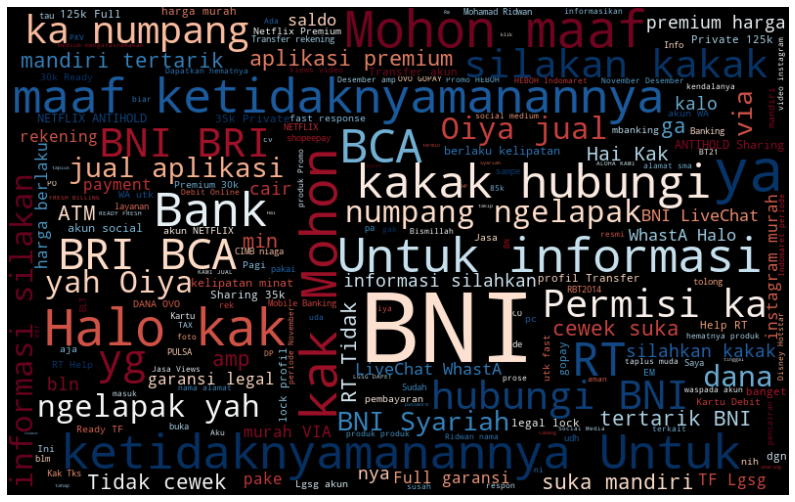

In [21]:
all_words21 = ' '.join([text for text in data21['tweets'][data21.sentiment == 'positive']])
generate_wordcloud(all_words21)

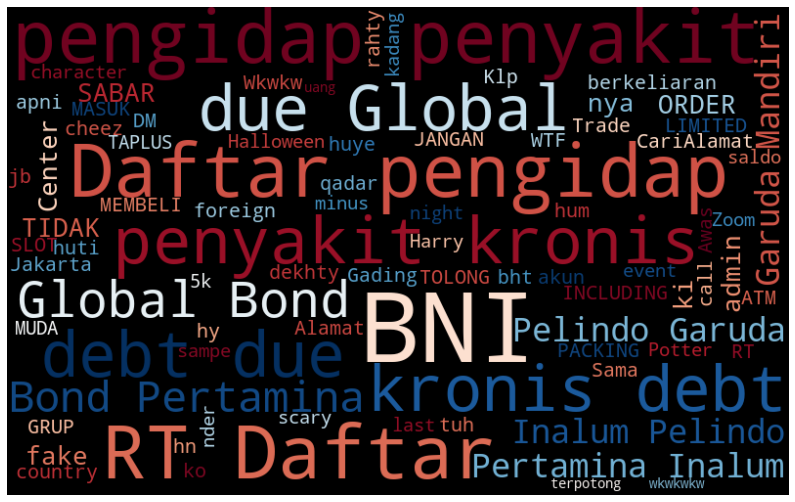

In [22]:
all_words21 = ' '.join([text for text in data21['tweets'][data21.sentiment == 'negative']])
generate_wordcloud(all_words21)

**Feature Extraction Using CountVectorizer**

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
# Count Vectorization features
count_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# Count Vectorization feature matrix
count_word_feature = count_word_vectorizer.fit_transform(data21['tweets'])

**Model Building: Sentiment Analysis**

In [25]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

In [26]:
target_variable = data21['sentiment'].apply(lambda x: 0 if x=='negative' else 1)

In [27]:
# Calculate accuracy by using confusion matrix
def plot_confusion_matrix(matrix):
    plt.clf()
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Set2_r)
    classNames = ['Positive', 'Negative']
    plt.title('Confusion Matrix')
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TP','FP'], ['FN', 'TN']]
    #TP = True Positive
    #FP = False Positive
    #FN = False Negative
    #TN = True Negative --> data negative terdeteksi benar

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(matrix[i][j]))
    plt.show()

Split to Training Data and Testing Data

In [28]:
X_train, X_test, y_train, y_test = train_test_split(count_word_feature, target_variable, test_size=0.3, random_state=272)

Support Vector Machine Model

Accuracy Score = 0.991304347826087


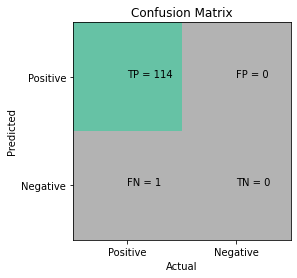

In [29]:
clf_svm = svm.SVC(kernel='sigmoid', gamma=1.0,probability=True)
clf_svm.fit(X_train,y_train)
pred_svm = clf_svm.predict(X_test.toarray())
print(f'Accuracy Score = {accuracy_score(y_test, pred_svm)}')
conf_matrix = confusion_matrix(y_test, pred_svm, labels=[True, False])
plot_confusion_matrix(conf_matrix)

Count Sentiment Positive and Negative Per Day

In [30]:
# convert time_date col to datetime64 dtype
data21['time'] = pd.to_datetime(data21['time'], utc=True) 
data21.set_index('time', inplace=True)
print(data21.index.date)

[datetime.date(2020, 11, 21) datetime.date(2020, 11, 21)
 datetime.date(2020, 11, 21) datetime.date(2020, 11, 21)
 datetime.date(2020, 11, 21) datetime.date(2020, 11, 21)
 datetime.date(2020, 11, 21) datetime.date(2020, 11, 21)
 datetime.date(2020, 11, 21) datetime.date(2020, 11, 21)
 datetime.date(2020, 11, 21) datetime.date(2020, 11, 21)
 datetime.date(2020, 11, 21) datetime.date(2020, 11, 21)
 datetime.date(2020, 11, 21) datetime.date(2020, 11, 21)
 datetime.date(2020, 11, 21) datetime.date(2020, 11, 21)
 datetime.date(2020, 11, 21) datetime.date(2020, 11, 21)
 datetime.date(2020, 11, 21) datetime.date(2020, 11, 21)
 datetime.date(2020, 11, 21) datetime.date(2020, 11, 21)
 datetime.date(2020, 11, 21) datetime.date(2020, 11, 21)
 datetime.date(2020, 11, 21) datetime.date(2020, 11, 21)
 datetime.date(2020, 11, 21) datetime.date(2020, 11, 21)
 datetime.date(2020, 11, 22) datetime.date(2020, 11, 22)
 datetime.date(2020, 11, 22) datetime.date(2020, 11, 22)
 datetime.date(2020, 11, 22) da

In [31]:
print(data21.groupby(data21.index.date).count())

            tweets  sentiment
2020-11-21      30         30
2020-11-22      30         30
2020-11-23      72         72
2020-11-24      37         37
2020-11-25      23         23
2020-11-26      38         38
2020-11-27      27         27
2020-11-28      36         36
2020-11-29      46         46
2020-11-30      42         42


In [32]:
data21["_dummy"]=1
df1=data21.pivot_table(index=["time"], columns="sentiment", values="_dummy", aggfunc="sum").fillna(0)
df1.replace(0, np.nan, inplace=True) # change value 0 to NaN
df1

result = pd.DataFrame(df1)
result

sentiment                  negative  positive
time                                         
2020-11-21 11:19:00+00:00       NaN       1.0
2020-11-21 11:22:00+00:00       NaN       2.0
2020-11-21 11:24:00+00:00       NaN       2.0
2020-11-21 11:30:00+00:00       NaN       2.0
2020-11-21 11:38:00+00:00       NaN       1.0
...                             ...       ...
2020-11-30 15:28:00+00:00       NaN       1.0
2020-11-30 15:29:00+00:00       NaN       1.0
2020-11-30 15:30:00+00:00       NaN       1.0
2020-11-30 15:32:00+00:00       NaN       2.0
2020-11-30 15:33:00+00:00       1.0       NaN

[278 rows x 2 columns]

In [33]:
output = result.groupby(result.index.date).count()
output

sentiment   negative  positive
2020-11-21         0        26
2020-11-22         1        25
2020-11-23         1        29
2020-11-24         3        28
2020-11-25         0        21
2020-11-26         1        31
2020-11-27         2        24
2020-11-28         2        32
2020-11-29         0        28
2020-11-30         3        26

Plot with Time series

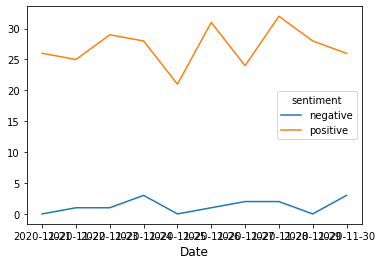

In [34]:
import matplotlib
import matplotlib.pyplot as plt

output.plot()
plt.xlabel("Date",size=12)
plt.show()

In [36]:
stock = pd.read_csv('BBNI.JK.csv')
stock.tail(12)

Date  Open  High   Low  Close  Adj Close     Volume
235  2020-11-21  5700  5800  5650   5675     5675.0   53141400
236  2020-11-22  5688  5888  5638   5788     5788.0   67838750
237  2020-11-23  5675  5975  5625   5900     5900.0   82536100
238  2020-11-24  5975  5975  5900   5950     5950.0   61987700
239  2020-11-25  6000  6175  6000   6050     6050.0  101206400
240  2020-11-26  6050  6350  6025   6300     6300.0   66773100
241  2020-11-27  6325  6375  6200   6350     6350.0   64918200
242  2020-11-28  6338  6363  6075   6175     6175.0  112662650
243  2020-11-29  6338  6363  6075   6175     6175.0  112662650
244  2020-11-30  6350  6350  5950   6000     6000.0  160407100
245  2020-12-01  6075  6250  5925   6250     6250.0   99785300
246  2020-12-02  6300  6375  6200   6350     6350.0   51993700

In [37]:
#stock_10 = pd.concat([stock.loc[235:244,['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close']]], axis=1)
stock_10 = pd.concat([stock.loc[235:244,['Date','Close']]], axis=1)
#stock_10.columns = ['time', 'Open', 'High', 'Low', 'Close', 'Adj Close']
stock_10.columns = ['time','Close']
stock_10

time  Close
235  2020-11-21   5675
236  2020-11-22   5788
237  2020-11-23   5900
238  2020-11-24   5950
239  2020-11-25   6050
240  2020-11-26   6300
241  2020-11-27   6350
242  2020-11-28   6175
243  2020-11-29   6175
244  2020-11-30   6000

In [38]:
stock_10['time'] = pd.to_datetime(stock_10['time'], errors='coerce')
stock_10

time  Close
235 2020-11-21   5675
236 2020-11-22   5788
237 2020-11-23   5900
238 2020-11-24   5950
239 2020-11-25   6050
240 2020-11-26   6300
241 2020-11-27   6350
242 2020-11-28   6175
243 2020-11-29   6175
244 2020-11-30   6000

In [39]:
# convert time_date col to datetime64 dtype
#stock_10['time'] = pd.to_datetime(stock_10['time'], utc=True) 
stock_10.set_index('time', inplace=True)
print(stock_10.index.date)

[datetime.date(2020, 11, 21) datetime.date(2020, 11, 22)
 datetime.date(2020, 11, 23) datetime.date(2020, 11, 24)
 datetime.date(2020, 11, 25) datetime.date(2020, 11, 26)
 datetime.date(2020, 11, 27) datetime.date(2020, 11, 28)
 datetime.date(2020, 11, 29) datetime.date(2020, 11, 30)]


In [240]:
stock_10

Close
time             
2020-11-21   5675
2020-11-22   5788
2020-11-23   5900
2020-11-24   5950
2020-11-25   6050
2020-11-26   6300
2020-11-27   6350
2020-11-28   6175
2020-11-29   6175
2020-11-30   6000

In [40]:
# Calculate the difference between rows - By default, periods = 1
difference = stock_10.diff(axis=0);
print("Difference between rows(Period=1):");
print(difference);

Difference between rows(Period=1):
            Close
time             
2020-11-21    NaN
2020-11-22  113.0
2020-11-23  112.0
2020-11-24   50.0
2020-11-25  100.0
2020-11-26  250.0
2020-11-27   50.0
2020-11-28 -175.0
2020-11-29    0.0
2020-11-30 -175.0


In [41]:
end_result = pd.concat([difference, output], axis=1)
end_result

Close  negative  positive
2020-11-21    NaN         0        26
2020-11-22  113.0         1        25
2020-11-23  112.0         1        29
2020-11-24   50.0         3        28
2020-11-25  100.0         0        21
2020-11-26  250.0         1        31
2020-11-27   50.0         2        24
2020-11-28 -175.0         2        32
2020-11-29    0.0         0        28
2020-11-30 -175.0         3        26

In [42]:
end_result1 = end_result.fillna(0)
end_result1

Close  negative  positive
2020-11-21    0.0         0        26
2020-11-22  113.0         1        25
2020-11-23  112.0         1        29
2020-11-24   50.0         3        28
2020-11-25  100.0         0        21
2020-11-26  250.0         1        31
2020-11-27   50.0         2        24
2020-11-28 -175.0         2        32
2020-11-29    0.0         0        28
2020-11-30 -175.0         3        26

Correlation Test Close ~ Sentiment


In [43]:
x = end_result1['Close']
y = end_result1['positive']
z = end_result1['negative']

In [44]:
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr

corr, _ = pearsonr(x, y)
print('Pearsons correlation Close ~ Positive: %.3f' % corr)
corr1,_ = pearsonr(x, z)
print('Pearsons correlation Close ~ Negative: %.3f' % corr1)

Pearsons correlation Close ~ Positive: -0.104
Pearsons correlation Close ~ Negative: -0.420


Plot Sentimen dan Saham

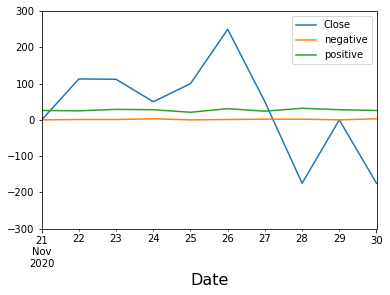

In [45]:
import matplotlib
import matplotlib.pyplot as plt

end_result1.plot()
plt.xlabel("Date",size=16)
plt.ylim(-300,300)

plt.show()

Linear Regression

In [46]:
x = end_result1['Close'].values.reshape(-1,1)
y = end_result1['positive'].values.reshape(-1,1)
z = end_result1['negative'].values.reshape(-1,1)

In [47]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)
print(model.coef_)
print(model.intercept_)
#Y = 0.183x ‚Äî 27.9178022

[[-0.00261888]]
[27.08511373]


Text(0.5, 1.0, 'Plot Close dengan Positive Sentiment')

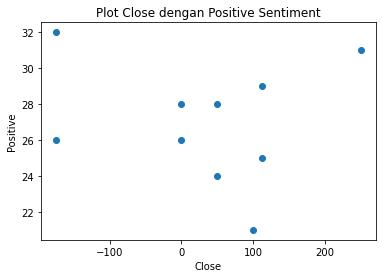

In [48]:
#Plotting
plt.scatter(x, y)
plt.xlabel('Close')
plt.ylabel('Positive')
plt.title('Plot Close dengan Positive Sentiment')

Text(0.5, 1.0, 'Plot Close dengan Negative Sentiment')

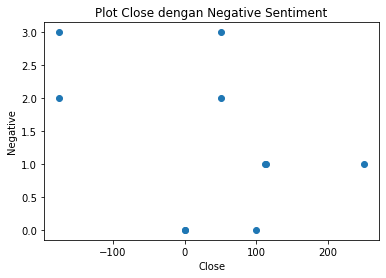

In [49]:
#Plotting
plt.scatter(x, z)
plt.xlabel('Close')
plt.ylabel('Negative')
plt.title('Plot Close dengan Negative Sentiment')